## Charge in uniform electric and magnetic fields

$$ m \frac{d^2 \vec{x}}{dt^2} = q \vec{E} + q \vec{v} \times \vec{B} $$

$$ \frac{d}{dt} 
\left[ \begin{array}{c}
x \\ y \\ z \\ v_x \\ v_y \\ v_z
\end{array} \right] =
\left[ \begin{array}{c}
0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & \frac{q}{m}B_z & -\frac{q}{m}B_y  \\
0 & 0 & 0 & -\frac{q}{m}B_z  & 0 & \frac{q}{m}B_x \\
0 & 0 & 0 & \frac{q}{m}B_y & -\frac{q}{m}B_x & 0 \\
\end{array}\right]
\left[ \begin{array}{c}
x \\ y \\ z \\ v_x \\ v_y \\ v_z
\end{array} \right] +
\left[ \begin{array}{c}
0 \\ 0 \\ 0 \\ \frac{q}{m}E_x \\ \frac{q}{m}E_y \\ \frac{q}{m}E_z
\end{array} \right]
$$

In [254]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [255]:
def chargeEMfields_dt(X,t,q,m,E,B):
    Ex,Ey,Ez = E
    Bx,By,Bz = B
    qm = q/m
    EX = np.array([0,0,0,qm*Ex,qm*Ey,qm*Ez])
    BX = np.array([
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
        [0,0,0,     0, qm*Bz,-qm*By],
        [0,0,0,-qm*Bz,     0, qm*Bx],
        [0,0,0, qm*By,-qm*Bx,     0],
    ])
    return np.dot(BX,X)+EX

In [256]:
q = -1.60217653e-19 # C
m = 9.1093826e-31*1000 # kg->g
vx = 8e6  # m/s
Ex = 10000 # V/m
Bz = 5e-3 # T

In [269]:
tmax = 0.00001
dt   = 0.00000001
t = np.arange(0, tmax+dt, dt)

In [270]:
E = (0,0,0)
#E = (Ex,0,0)

B = (0,0,Bz)
#B = (0,0,0)

X0 = [0,0,0,vx,0,0]
#X0 = [0,0,0,0,0,0]

X = odeint(chargeEMfields_dt, X0, t, args=(q,m,E,B))

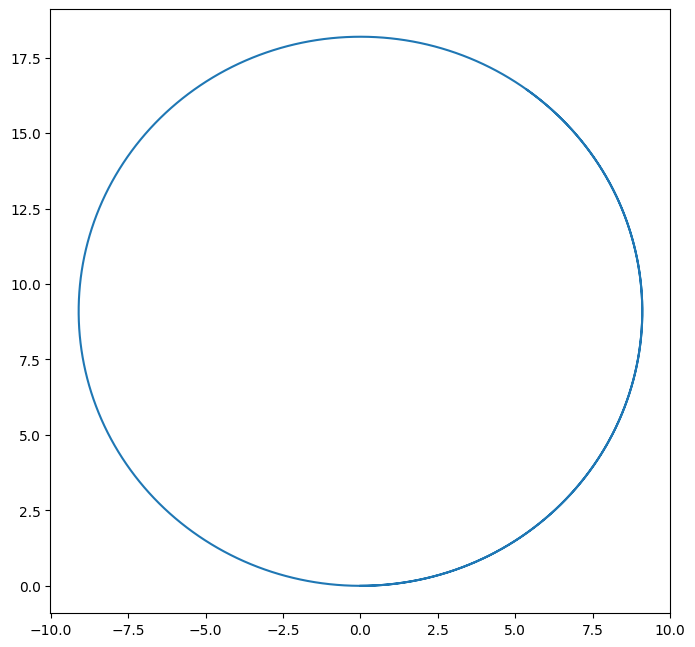

In [271]:
x,y,z = X[:,0], X[:,1], X[:,2]

fig = plt.figure(figsize=(8,8),dpi=100)
ax = fig.add_subplot(111)
ax.plot(x,y,"-")

#ax = fig.add_subplot(111,projection='3d')
#ax.plot(x,y,z,"-")